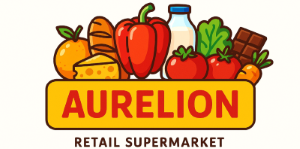

<h1 style="color: orange; font-size: 37px;"><b>TIENDA AURELION</b></h1>

### Sprint 02 - Aplicando visualizaciones

#### Grupo A
Integrantes:
 * Buenanueva, Roxana
 * Fica Millán, Yesica
 * Gerez Valenzuela, Leandro
 * Rodas, David

### 🟢 Introducción
En este sprint se realiza un análisis exploratorio de datos de ventas y clientes de la Tienda Aurelion, utilizando herramientas de visualización para identificar patrones, tendencias y comportamientos de compra.

Se estudian **variables clave** como el `total de ventas por mes`, la `relación entre cantidad y monto de venta`, los `productos más vendidos`, la `rentabilidad` y `fidelidad de los clientes`, y la `distribución de medios de pago`, incluyendo su `comportamiento por ciudad`.

El objetivo es obtener insights accionables que permitan mejorar la estrategia comercial y la relación con los clientes.

### 🟢 Flujo de Visualizaciones

#### 1️⃣ Contexto General del Dataset
- `df.info()`, primeras filas, estadísticas descriptivas
- Conteo de nulos y valores únicos
> Objetivo: Conocer la estructura, calidad y características generales de los datos antes del análisis.

#### 2️⃣ Análisis Temporal de Ventas
- Ventas Totales por Mes
- Interpretación de máximos, mínimos y promedio
> Objetivo: Identificar tendencias, estacionalidad y comportamientos cíclicos de las ventas.

#### 3️⃣ Relación Cantidad vs Total de Venta
- Gráfico de dispersión con línea de tendencia
- Correlación entre cantidad vendida y total de venta
> Objetivo: Evaluar cómo la cantidad de productos impacta en los ingresos, detectar productos premium.

#### 4️⃣ Productos Más Vendidos
- Top 10 productos por cantidad vendida
- Líneas de referencia: media, mediana, moda
> Objetivo: Conocer los productos más relevantes y su comportamiento frente a métricas centrales.

#### 5️⃣ Incidencia de los productos en las ventas
- Aproximadamente el 20% de los productos generan el 80% de las ventas
- Líneas de referencia: media, mediana
> Objetivo: Conocer los productos que más impactan en las ventas.

#### 6️⃣ Análisis de Clientes
- Importe total por cliente
- Cantidad de compras por cliente
> Objetivo: Identificar clientes de alto valor, clientes frecuentes y oportunidades de fidelización.

#### 7️⃣ Medios de Pago
- Distribución porcentual de medios de pago (gráfico de torta)
- Comparación por ciudad (gráfico de barras agrupadas)
> Objetivo: Entender las preferencias de pago y su variación geográfica, para decisiones comerciales y logísticas.

### 🟢 Importar librerias

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython.display import display
from itertools import cycle, islice

### 🟢 Carga dataset


In [42]:
df = pd.read_csv(
    "data/df_tienda_aurelion_modificado.csv",
    parse_dates=['fecha_alta', 'fecha_venta'])

print("\n✅ Dataset cargado correctamente")


✅ Dataset cargado correctamente


### 🟢 Definicion paleta de colores

In [43]:
# Paleta de colores
PALETA = {
    "principal": "#E89C30",
    "secundario": "#C66A13",
    "claro": "#F4B860",
    "suave": "#FF8A80",
    "acento1": "#4F6D7A",
    "acento2": "#1F3B4D"
}

# --- Función para mostrar tablas con estilo ---
def mostrar_tabla_estilizada(df, n=10, color_encabezado=PALETA["principal"]):
    df_reset = df.head(n).reset_index(drop=True)
    estilo = (
        df_reset.style
        .set_table_styles([
            {'selector': 'thead th',
             'props': [('background-color', color_encabezado),
                       ('color', 'white'),
                       ('font-weight', 'bold'),
                       ('text-align', 'center')]}
        ])
        .set_properties(**{'text-align': 'center'})
    )
    display(estilo)

### 🟢 Estadísticas descriptivas básicas

In [44]:
print("\n🔶Información general del DataFrame:\n")
print("-" * 44)
df.info()

print("\n\n🔶 Primeras filas del dataset:\n")
mostrar_tabla_estilizada(df.head())

# --- Resumen estadístico para variables numéricas ---
# Columnas de fecha a excluir
fecha_cols = ['fecha_venta', 'fecha_alta']
id_cols = ['id_venta', 'id_cliente', 'id_producto']

# Columnas numéricas reales
num_cols = df.select_dtypes(include=['number']).columns
num_cols = [col for col in num_cols if col not in fecha_cols + id_cols]

# Calcular estadísticas y redondear
resumen_num = df[num_cols].describe().T.reset_index()
resumen_num.rename(columns={'index': 'Variable'}, inplace=True)

# Redondear los valores numéricos a 2 decimales
for col in resumen_num.columns[1:]:  # exceptuando la columna 'Variable'
    resumen_num[col] = resumen_num[col].map(lambda x: f"{x:.2f}")

# Mostrar estadísticas solo de esas columnas
print("\n\n🔶 Estadísticas descriptivas para variables numéricas:\n")
mostrar_tabla_estilizada(resumen_num)

# --- Resumen para variables categóricas ---
resumen_cat = df.describe(include=['object', 'category']).T.reset_index()
resumen_cat.rename(columns={'index': 'Variable'}, inplace=True)

print("\n\n🔶 Estadísticas descriptivas para variables categóricas:\n")
mostrar_tabla_estilizada(resumen_cat)

# Conteo de valores nulos
print("\n\n🔶 Conteo de valores nulos por columna:\n")
nulos = df.isnull().sum().to_frame(name='Valores nulos').reset_index()
nulos.rename(columns={'index': 'Columna'}, inplace=True)
mostrar_tabla_estilizada(nulos)

# Distribución de valores únicos
print("\n\n🔶 Cantidad de valores únicos por columna:\n")
unicos = df.nunique().to_frame(name='Valores únicos').reset_index()
unicos.rename(columns={'index': 'Columna'}, inplace=True)
mostrar_tabla_estilizada(unicos)



🔶Información general del DataFrame:

--------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343 entries, 0 to 342
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id_venta         343 non-null    int64         
 1   fecha_venta      343 non-null    datetime64[ns]
 2   id_cliente       343 non-null    int64         
 3   nombre_cliente   343 non-null    object        
 4   email            343 non-null    object        
 5   medio_pago       343 non-null    object        
 6   ciudad           343 non-null    object        
 7   fecha_alta       343 non-null    datetime64[ns]
 8   id_producto      343 non-null    int64         
 9   nombre_producto  343 non-null    object        
 10  cantidad         343 non-null    int64         
 11  precio_unitario  343 non-null    int64         
 12  categoria        343 non-null    object        
 13  total_venta 

,id_venta,fecha_venta,id_cliente,nombre_cliente,email,medio_pago,ciudad,fecha_alta,id_producto,nombre_producto,cantidad,precio_unitario,categoria,total_venta,mes
0,1,2024-06-19 00:00:00,62,Guadalupe Romero,guadalupe.romero@mail.com,tarjeta,Carlos Paz,2023-03-03 00:00:00,90,Toallas Húmedas x50,1,2902,Limpieza,2902,2024-06
1,2,2024-03-17 00:00:00,49,Olivia Gomez,olivia.gomez@mail.com,qr,Rio Cuarto,2023-02-18 00:00:00,82,Aceitunas Negras 200g,5,2394,Limpieza,11970,2024-03
2,2,2024-03-17 00:00:00,49,Olivia Gomez,olivia.gomez@mail.com,qr,Rio Cuarto,2023-02-18 00:00:00,39,Helado Vainilla 1L,5,469,Alimentos,2345,2024-03
3,2,2024-03-17 00:00:00,49,Olivia Gomez,olivia.gomez@mail.com,qr,Rio Cuarto,2023-02-18 00:00:00,70,Fernet 750ml,2,4061,Limpieza,8122,2024-03
4,2,2024-03-17 00:00:00,49,Olivia Gomez,olivia.gomez@mail.com,qr,Rio Cuarto,2023-02-18 00:00:00,22,Medialunas de Manteca,1,2069,Limpieza,2069,2024-03




🔶 Estadísticas descriptivas para variables numéricas:



,Variable,count,mean,std,min,25%,50%,75%,max
0,cantidad,343.00,2.96,1.37,1.00,2.00,3.00,4.00,5.00
1,precio_unitario,343.00,2654.50,1308.69,272.00,1618.50,2512.00,3876.00,4982.00
2,total_venta,343.00,7730.08,5265.54,272.00,3489.00,6702.00,10231.50,24865.00




🔶 Estadísticas descriptivas para variables categóricas:



,Variable,count,unique,top,freq
0,nombre_cliente,343,64,Agustina Flores,15
1,email,343,67,agustina.flores@mail.com,15
2,medio_pago,343,4,efectivo,111
3,ciudad,343,6,Rio Cuarto,104
4,nombre_producto,343,95,Queso Rallado 150g,9
5,categoria,343,2,Limpieza,178
6,mes,343,6,2024-05,69




🔶 Conteo de valores nulos por columna:



,Columna,Valores nulos
0,id_venta,0
1,fecha_venta,0
2,id_cliente,0
3,nombre_cliente,0
4,email,0
5,medio_pago,0
6,ciudad,0
7,fecha_alta,0
8,id_producto,0
9,nombre_producto,0




🔶 Cantidad de valores únicos por columna:



,Columna,Valores únicos
0,id_venta,120
1,fecha_venta,93
2,id_cliente,67
3,nombre_cliente,64
4,email,67
5,medio_pago,4
6,ciudad,6
7,fecha_alta,67
8,id_producto,95
9,nombre_producto,95


### 🟢 Ventas Totales por Mes

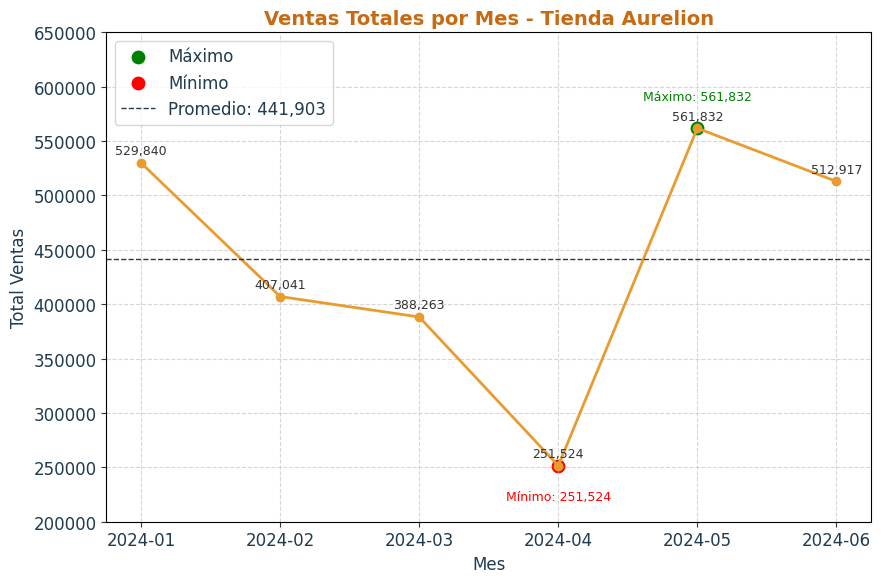

In [45]:
# Verificar que existan las columnas
if 'fecha_venta' in df.columns and 'total_venta' in df.columns:

    # Convertir fecha y agrupar por mes
    df['fecha_venta'] = pd.to_datetime(df['fecha_venta'])
    df['mes'] = df['fecha_venta'].dt.to_period('M')
    ventas_mes = df.groupby('mes')['total_venta'].sum().reset_index()

    plt.figure(figsize=(9,6))
    plt.plot(
        ventas_mes['mes'].astype(str),
        ventas_mes['total_venta'],
        marker='o',
        color=PALETA["principal"],
        linewidth=2
    )

    # Etiquetas de valor en cada punto
    for x, y in zip(ventas_mes['mes'].astype(str), ventas_mes['total_venta']):
        plt.text(x, y + 8000, f"{y:,.0f}", ha='center', fontsize=9, color='#333333')

    # Destacar máximo y mínimo
    max_mes = ventas_mes.loc[ventas_mes['total_venta'].idxmax()]
    min_mes = ventas_mes.loc[ventas_mes['total_venta'].idxmin()]

    plt.scatter(str(max_mes['mes']), max_mes['total_venta'], color='green', s=80, label='Máximo')
    plt.scatter(str(min_mes['mes']), min_mes['total_venta'], color='red', s=80, label='Mínimo')

    plt.annotate(
        f"Máximo: {max_mes['total_venta']:,.0f}",
        xy=(str(max_mes['mes']), max_mes['total_venta']),
        xytext=(0, 20),
        textcoords='offset points',
        ha='center',
        color='green',
        fontsize=9
    )

    plt.annotate(
        f"Mínimo: {min_mes['total_venta']:,.0f}",
        xy=(str(min_mes['mes']), min_mes['total_venta']),
        xytext=(0, -25),
        textcoords='offset points',
        ha='center',
        color='red',
        fontsize=9
    )

    # Línea de promedio
    promedio = ventas_mes['total_venta'].mean()
    plt.axhline(promedio, color=PALETA["acento2"], linestyle='--', linewidth=1, label=f'Promedio: {promedio:,.0f}')

    # Ajuste del eje Y
    plt.ylim(200000, 650000)

    # Configuración estética
    plt.title("Ventas Totales por Mes - Tienda Aurelion", fontsize=14, fontweight="bold", color=PALETA["secundario"])
    plt.xlabel("Mes")
    plt.ylabel("Total Ventas")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.legend()
    plt.tight_layout()
    plt.show()


### **Interpretación:**

🔸 **Tendencia mensual:**

* Enero: las ventas arrancan altas (~530.000).
* Luego se observa una caída progresiva hasta abril, que marca el punto más bajo (~250.000).
* A partir de abril, hay una recuperación fuerte en mayo (pico máximo del semestre, ~560.000).
* En junio las ventas bajan ligeramente, aunque se mantienen por encima del promedio general.

🔸**Conclusión**:

* Hay una **estacionalidad marcada**, con una caída hacia el otoño (marzo–abril) y repunte en mayo, posiblemente por promociones, nuevos lanzamientos o fechas comerciales (por ejemplo, el Día del Trabajador o Día de la Madre).
* El comportamiento sugiere que la **demanda no es constante**, sino influenciada por eventos o ciclos de consumo.

### 🟢 Relación cantidad vs Total venta

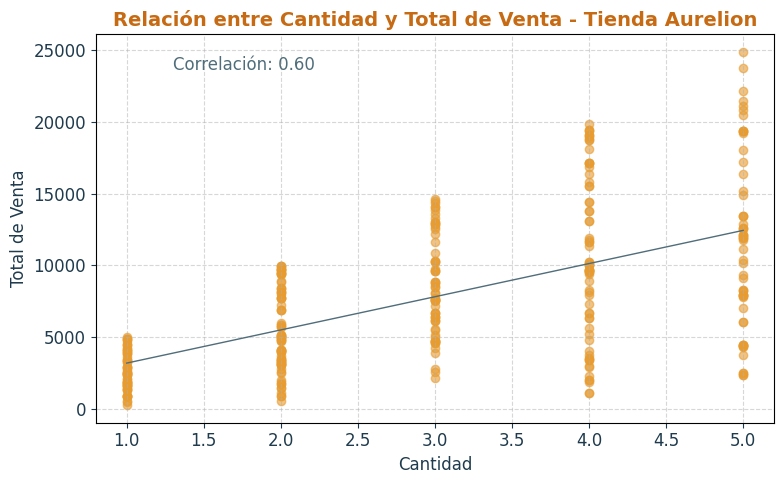

In [46]:
# Verificar que existan las columnas
if 'cantidad' in df.columns and 'total_venta' in df.columns:
    plt.figure(figsize=(8,5))

    # Gráfico de dispersión con línea de tendencia
    sns.regplot(
        data=df,
        x='cantidad',
        y='total_venta',
        scatter_kws={'color': PALETA["principal"], 'alpha': 0.6},
        line_kws={'color': PALETA["acento1"], 'linewidth': 1},
        ci=None  # sin banda de confianza
    )

    # Calcular correlación
    corr = df['cantidad'].corr(df['total_venta'])

    # Configurar títulos y etiquetas
    plt.title("Relación entre Cantidad y Total de Venta - Tienda Aurelion", fontsize=14, fontweight="bold", color=PALETA["secundario"])
    plt.xlabel("Cantidad")
    plt.ylabel("Total de Venta")
    plt.grid(True, linestyle='--', alpha=0.5)

    # Mostrar valor de correlación
    plt.text(
        x=df['cantidad'].min() + 0.3,
        y=df['total_venta'].max() * 0.95,
        s=f"Correlación: {corr:.2f}",
        fontsize=12,
        color=PALETA["acento1"],
    )

    plt.tight_layout()
    plt.show()


### **Interpretación:**

🔸 Correlación: 0.60, lo que indica una relación positiva moderada.

  → A mayor cantidad de unidades vendidas, generalmente aumenta el total de venta, aunque no de manera perfecta. Esto se debe a que el **precio unitario** también influye significativamente.

🔸 Patrón observado:
* La nube de puntos muestra **dispersión**, pero con una clara tendencia ascendente.
* Existen ventas con **pocas unidades** pero con **importes elevados**, lo que sugiere la presencia de productos premium.
* La mayoría de las ventas se concentran en **cantidades bajas (1 a 3 unidades)**, con alta variabilidad en el total según el tipo de producto.
* Cuando la cantidad aumenta (4 o 5 unidades), el total de venta crece de forma notable, con casos que superan los **$20.000–$25.000**.

### 🟢 Productos más Vendidos

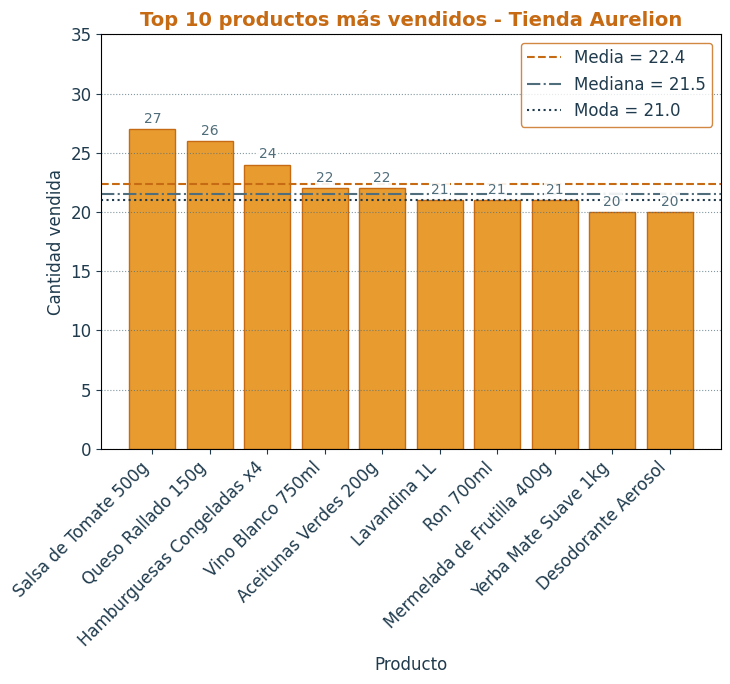

In [47]:
# Check if df is already defined to avoid reloading if not necessary
if 'df' not in locals() and 'df' not in globals():
    try:
        # Assuming the file is already uploaded or available in the Colab environment
        df = pd.read_csv('df_tienda_aurelion.csv')
        print("✅ Dataset loaded correctly")
    except FileNotFoundError:
        print("❌ Error: 'df_tienda_aurelion.csv' not found. Please upload the file.")
        # You might want to exit or handle this case appropriately
        # For now, I'll just print the error and continue, which will likely lead to further errors
        # if the DataFrame is needed later.
    except Exception as e:
        print(f"❌ An error occurred while loading the dataset: {e}")
        # Handle other potential errors during file reading.


# --- 1. Agrupar por nombre de producto y sumar las cantidades ---
if 'df' in locals() or 'df' in globals(): # Ensure df is defined before proceeding
    if 'nombre_producto' in df.columns and 'cantidad' in df.columns:
        ventas_prod = (
            df.groupby("nombre_producto")["cantidad"]
            .sum()
            .sort_values(ascending=False)
            .head(10)
        )

        # --- 2. Calcular medidas estadísticas ---
        media = ventas_prod.mean()
        mediana = ventas_prod.median()
        moda = ventas_prod.mode()[0] if not ventas_prod.mode().empty else np.nan

        # --- 4. Crear gráfico de barras ---
        plt.figure(figsize=(7.5,7))
        bars = plt.bar(ventas_prod.index, ventas_prod.values, color=PALETA["principal"], edgecolor=PALETA["secundario"])

        # --- 5. Etiquetas y título ---
        plt.title("Top 10 productos más vendidos - Tienda Aurelion", fontsize=14, fontweight="bold", color=PALETA["secundario"])
        plt.xlabel("Producto", fontsize=12)
        plt.ylabel("Cantidad vendida", fontsize=12)
        plt.xticks(rotation=45, ha="right")

        # --- 6. Líneas de referencia con la paleta ---
        plt.axhline(media, color=PALETA["secundario"], linestyle="--", linewidth=1.5, label=f"Media = {media:.1f}", zorder=1)
        plt.axhline(mediana, color=PALETA["acento1"], linestyle="-.", linewidth=1.5, label=f"Mediana = {mediana:.1f}", zorder=1)
        if not np.isnan(moda):
            plt.axhline(moda, color=PALETA["acento2"], linestyle=":", linewidth=1.5, label=f"Moda = {moda:.1f}", zorder=1)

        # --- 7. Añadir leyenda y valores sobre las barras ---
        plt.legend(facecolor="white", edgecolor=PALETA["secundario"])
        for i, val in enumerate(ventas_prod.values):
            plt.text(i, val + max(ventas_prod.values)*0.01, f"{int(val)}", ha="center", va="bottom", fontsize=10,
                     color=PALETA["acento1"], bbox=dict(facecolor="white", edgecolor="none", alpha=0.9, pad=1) )

        plt.grid(axis="y", linestyle=":", color=PALETA["acento1"], alpha=0.7)
        plt.tight_layout()
        plt.ylim(0, 35)   # Limitar el eje Y desde 0 hasta 35
        plt.show()
    else:
        print("❌ Error: 'nombre_producto' or 'cantidad' columns not found in the DataFrame.")
else:
    print("❌ Error: DataFrame 'df' is not defined after attempting to load the dtaaset.")

### **Interpretación:**

El gráfico muestra los 10 productos más vendidos. Se observa una clara
concentración de ventas en unos pocos productos líderes, que superan significativamente la media y la mediana del resto. Esto indica que una parte importante de los ingresos depende de un grupo reducido del catálogo, mientras que otros productos presentan rotación más baja.

🔸 Desde la perspectiva de gestión de stock, conviene:

* Asegurar inventario suficiente de los productos con ventas por encima de la media para evitar quiebres de stock y pérdida de ventas.
* Revisar los productos por debajo de la mediana, ya que podrían estar inmovilizando capital o requerir estrategias de promoción o reposicionamiento.
* Analizar márgenes: si los productos más vendidos también son los más rentables, reforzar su disponibilidad; si no, revisar precios o costos.
* Planificar compras y reposición basándose en la tendencia de los productos top, ajustando las órdenes a la demanda real y estacionalidad.

### 🟢 Incidencia de los Productos en las Ventas

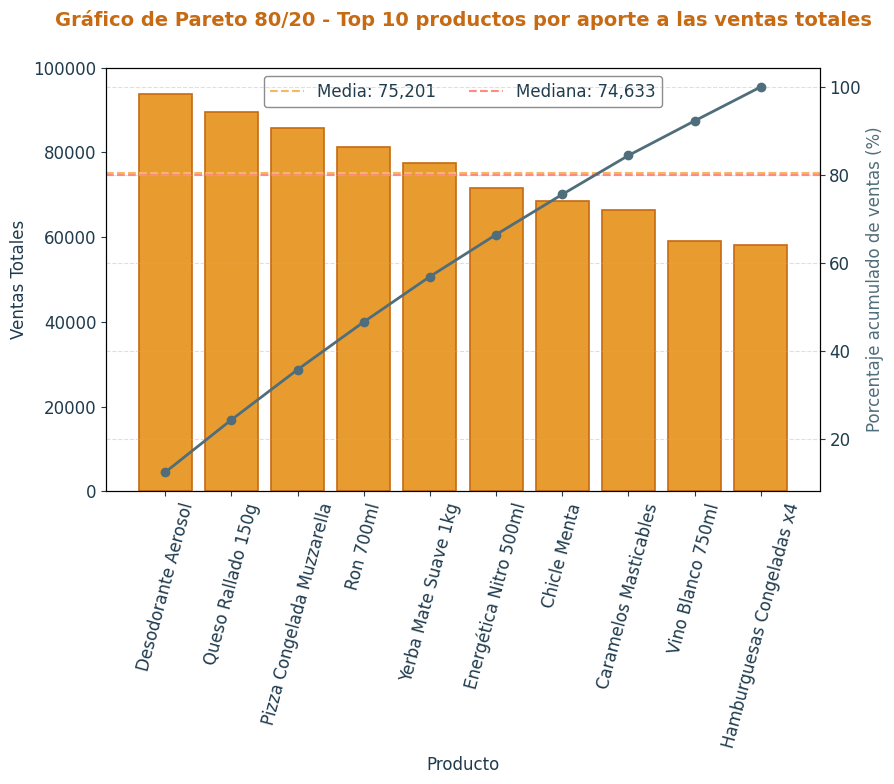

In [48]:
columna_ventas = 'importe' if 'importe' in df.columns else 'total_venta'

ventas_por_producto = (
    df.groupby('nombre_producto')[columna_ventas]
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)
         
# --- Filtrar solo los 10 productos más vendidos ---
top10 = ventas_por_producto.head(10).copy()

# --- Calcular el porcentaje acumulado ---
top10['Porcentaje_Acumulado'] = 100 * top10[columna_ventas].cumsum() / top10[columna_ventas].sum()

# --- Crear gráfico de Pareto (Top 10 productos) ---
fig, ax1 = plt.subplots(figsize=(9,8))

# Barras de ventas (usamos un degradado visual)
ax1.bar(top10['nombre_producto'], top10[columna_ventas],
        color=PALETA["principal"], edgecolor=PALETA["secundario"], linewidth=1.2)
ax1.set_xlabel("Producto", fontsize=12)
ax1.set_ylabel("Ventas Totales", color=PALETA["acento2"], fontsize=12)
ax1.tick_params(axis='x', rotation=75)

# Línea del porcentaje acumulado
ax2 = ax1.twinx()
ax2.plot(top10['nombre_producto'], top10['Porcentaje_Acumulado'],
         color=PALETA["acento1"], marker='o', linewidth=2)
ax2.set_ylabel("Porcentaje acumulado de ventas (%)", color=PALETA["acento1"], fontsize=12)

# --- Calcular y mostrar media y mediana ---
media = top10[columna_ventas].mean()
mediana = top10[columna_ventas].median()

# Líneas de referencia con colores suaves
ax1.axhline(media, color=PALETA["claro"], linestyle='--', linewidth=1.5, label=f"Media: {media:,.0f}")
ax1.axhline(mediana, color=PALETA["suave"], linestyle='--', linewidth=1.5, label=f"Mediana: {mediana:,.0f}")

# --- Leyenda optimizada y ajuste de márgenes ---
ax1.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, 1.00),   # más abajo que antes para no tapar el título
    ncol=2,
    facecolor='white',
    framealpha=0.9,
    edgecolor='gray'
)

# Ajustar márgenes para equilibrar título, gráfico y leyenda
plt.subplots_adjust(top=0.88, bottom=0.22, right=0.88)

# --- Título descriptivo ---
plt.title(
    "Gráfico de Pareto 80/20 - Top 10 productos por aporte a las ventas totales",
    fontsize=14,
    fontweight='bold',
    color=PALETA["secundario"],
    pad=30    # ← deja espacio entre el título y la leyenda
)

plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
ax1.set_ylim(0, 100000)
plt.show()

### **Interpretación:**

* El gráfico de Pareto muestra que una pequeña cantidad de productos concentra la mayor parte de las ventas totales: aproximadamente el 20 % de los productos generan cerca del 80 % de los ingresos.
* Los primeros artículos del ranking representan el núcleo del negocio, siendo los más rentables y con mayor rotación.
* Por el contrario, los productos ubicados al final del gráfico aportan un porcentaje marginal al total, lo que sugiere oportunidades para revisar su estrategia comercial, como promociones, sustitución o reducción de stock.
* Las líneas de media y mediana confirman que la mayoría de los productos se ubican por debajo del promedio de ventas, reforzando la desigual distribución del aporte económico entre los artículos.

### 🟢 Importe por Cliente

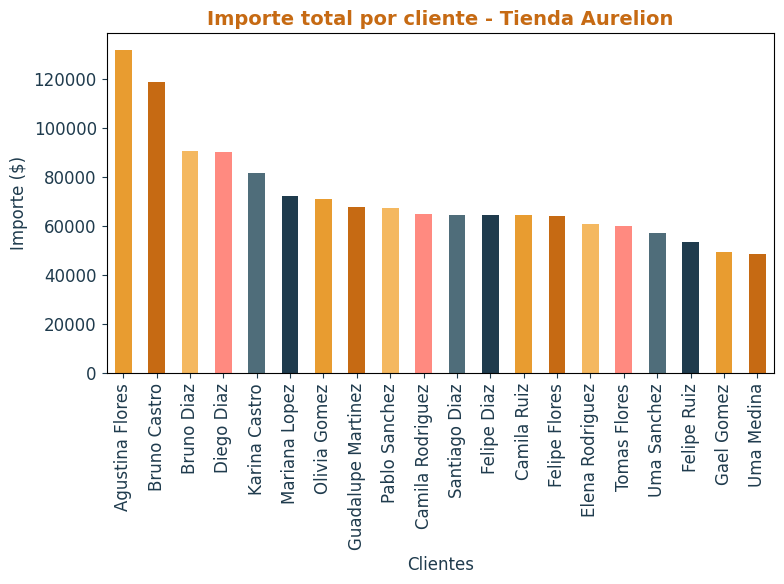

In [49]:
# Agrupa las ventas por cliente, suma el total y selecciona los 20 clientes con mayor importe
df_c = df.groupby('nombre_cliente')['total_venta'].sum().sort_values(ascending=False).head(20)

# Configura la figura
plt.figure(figsize=(8, 6))

# Define los colores para las barras usando tu paleta
colores = [PALETA["principal"], PALETA["secundario"], PALETA["claro"],
           PALETA["suave"], PALETA["acento1"], PALETA["acento2"]]
df_c.plot(kind='bar', color=colores)

# Añade títulos y etiquetas
plt.title("Importe total por cliente - Tienda Aurelion", fontsize=14, fontweight="bold", color=PALETA["secundario"])
plt.xlabel('Clientes')
plt.ylabel('Importe ($)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


### **Interpretación:**

🔸 Estos son los clientes más rentables del negocio. Se debe buscar la manera de mantenerlos conformes y que se vuelvan clientes fieles.


### 🟢 Cantidad de Compras por Cliente

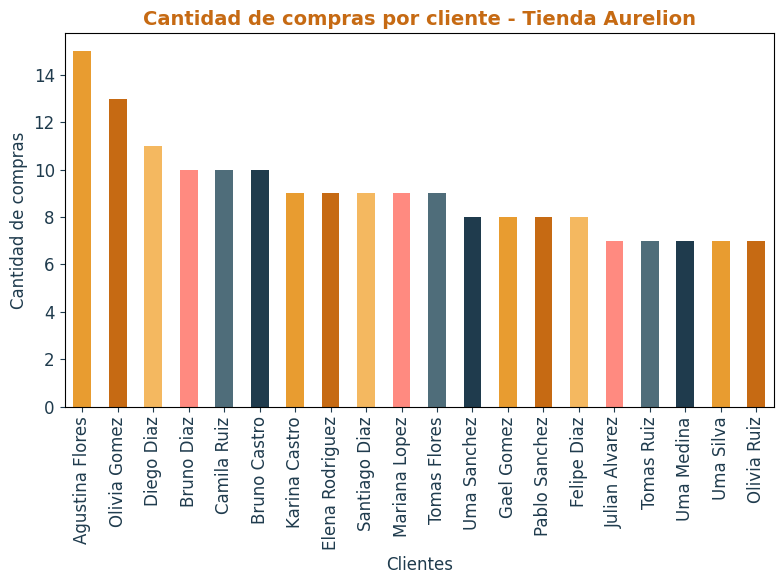

In [50]:
# Agrupa por cliente y cuenta la cantidad de ventas, seleccionando los 20 con más transacciones
df_c = df.groupby('nombre_cliente')['id_venta'].count().sort_values(ascending=False).head(20)

# Configura la figura y su tamaño
plt.figure(figsize=(8, 6))

# Define los colores para las barras usando tu paleta
colores = [PALETA["principal"], PALETA["secundario"], PALETA["claro"],
           PALETA["suave"], PALETA["acento1"], PALETA["acento2"]]

# Crea el gráfico de barras con los colores definidos
df_c.plot(kind='bar', color=colores)

# Añade títulos y etiquetas
plt.title("Cantidad de compras por cliente - Tienda Aurelion", fontsize=14, fontweight="bold", color=PALETA["secundario"])
plt.xlabel('Clientes')
plt.ylabel('Cantidad de compras')

# Rota las etiquetas del eje X para mejorar la lectura
plt.xticks(rotation=90)

# Ajusta el diseño para que los elementos no se corten
plt.tight_layout()

# Muestra el gráfico
plt.show()


### **Interpretación:**

🔸 Aquí se muestran los clientes más fieles del negocio que son menos sensibles al cambio de precios de los productos. Se puede buscar implementar programas de fidelidad a ellos.

Con estas dos gráficas se busca identificar los siguientes tipos de clientes:
* Altísima Frecuencia y Alto Gasto: es el segmento de "Campeones". Son clientes que compran a menudo y gastan mucho. Hay que enfocarse en mantenerlos conformes.
* Baja Frecuencia y Alto Gasto: "Clientes de Alto Valor Potencial". Compran poco, pero cuando lo hacen, gastan mucho. Hay que enfocarse en aumentar su frecuencia.
* Alta Frecuencia y Bajo Gasto: "Clientes Fieles de Bajo Valor". Vienen a menudo, pero compran poco. Se debe encontrar la manera de aumentar su Ticket Promedio.

#### 🟢 Distribución Medios de Pago

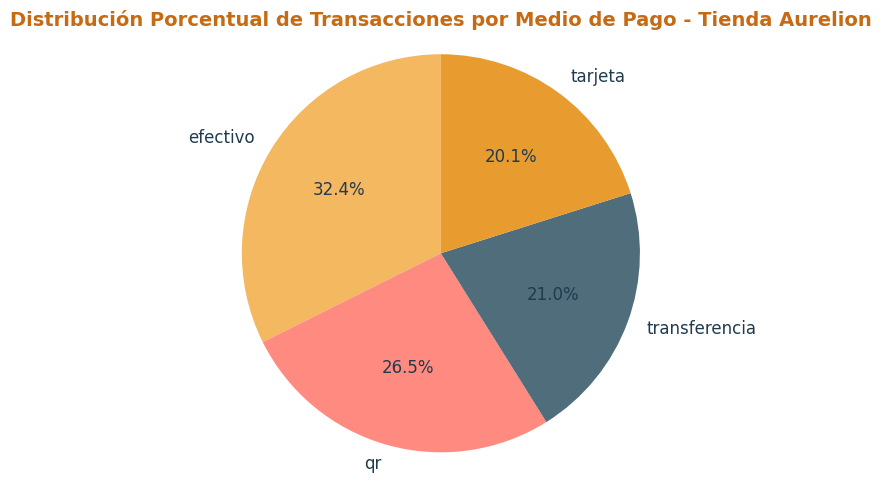

In [51]:
# --- Cuenta la frecuencia de aparición de cada medio de pago ---
conteo_pagos = df['medio_pago'].value_counts()

# Convertimos la paleta en una lista de
colores = [PALETA["claro"], PALETA["suave"],
           PALETA["acento1"], PALETA["principal"]]

# Si hay más categorías que colores, repetimos la paleta
if len(conteo_pagos) > len(colores):
    from itertools import cycle, islice
    colores = list(islice(cycle(colores), len(conteo_pagos)))

# --- Gráfico de torta ---
plt.figure(figsize=(8, 5))
plt.pie(
    conteo_pagos.values,
    labels=conteo_pagos.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colores
)
plt.title("Distribución Porcentual de Transacciones por Medio de Pago - Tienda Aurelion", fontsize=14, fontweight="bold", color=PALETA["secundario"])
plt.axis('equal')
plt.tight_layout()
plt.show()


### **Interpretación:**

🔸 Este Diagrama de Torta muestra la participación porcentual de cada Medio de Pago en el total de transacciones.

#### 🟢 Distribución Medios de Pago por Ciudad

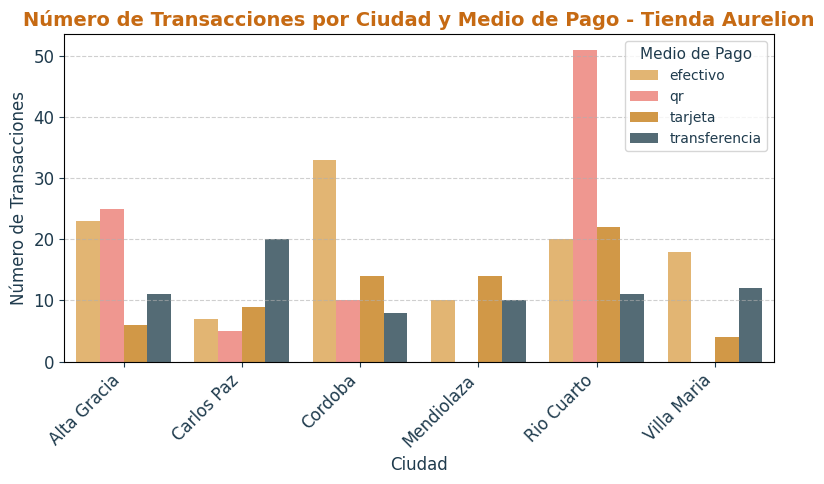

In [52]:
# --- Columnas y agrupación ---
col_ciudad = 'ciudad'
col_pago = 'medio_pago'

df_agrupado = (
    df.groupby([col_ciudad, col_pago])
      .size()
      .reset_index(name='Transacciones')
)

# Creamos una lista de colores desde la paleta
colores = [PALETA["claro"], PALETA["suave"],
           PALETA["principal"], PALETA["acento1"]]

# Si hay más categorías que colores, repetimos la paleta
categorias_pago = df_agrupado[col_pago].unique()
if len(categorias_pago) > len(colores):
    colores = list(islice(cycle(colores), len(categorias_pago)))

# --- Configuración general del estilo ---
plt.rcParams.update({
    'text.color': PALETA["acento2"],
    'axes.labelcolor': PALETA["acento2"],
    'xtick.color': PALETA["acento2"],
    'ytick.color': PALETA["acento2"],
    'font.size': 12
})

# --- Gráfico ---
plt.figure(figsize=(8, 5))
sns.barplot(
    x=col_ciudad,
    y='Transacciones',
    hue=col_pago,
    data=df_agrupado,
    palette=colores,
    errorbar=None
)

# --- Estética general ---
plt.title("Número de Transacciones por Ciudad y Medio de Pago - Tienda Aurelion", fontsize=14, fontweight="bold", color=PALETA["secundario"])
plt.xlabel('Ciudad', fontsize=12)
plt.ylabel('Número de Transacciones', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Medio de Pago', title_fontsize=11, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

plt.show()


### **Interpretación:**

🔸 Este Gráfico de Barras Agrupadas compara la cantidad absoluta de transacciones para cada medio de pago, separadas por Ciudad, identificando tendencias geográficas.

### 🟢 Conclusiones
A partir del análisis se observaron tendencias claras:

* Las ventas presentan estacionalidad, con picos y valles mensuales que pueden asociarse a eventos o promociones específicas.
* Existe una relación positiva moderada entre la cantidad de unidades vendidas y el total de venta, destacando productos premium que generan altos importes con pocas unidades.
* Se identificaron los clientes más rentables y los más frecuentes, lo que permite segmentarlos en grupos estratégicos para acciones de fidelización y marketing personalizado.
* Se detectaron los productos más vendidos y los que presentan un mayor impacto en las ventas, lo que permite tomar decisiones de stock y estrategias de venta: costos y promociones.
* Los medios de pago y su distribución por ciudad muestran patrones geográficos que pueden orientar campañas y decisiones logísticas.
* En conjunto, estas visualizaciones proporcionan una visión integral del comportamiento comercial, apoyando la toma de decisiones basada en datos y la optimización de la estrategia de ventas.